# Color-Based 2D Feature Detection
## Team LeakSeek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2 as cv
import scipy.spatial as sp

### Constants

In [2]:
# File Paths
MANIFOLD_IMG_PATH = 'manifold.png'
FEATURE_IMG_PATH = 'feature.png'

### Read Manifold and Reference Feature Images

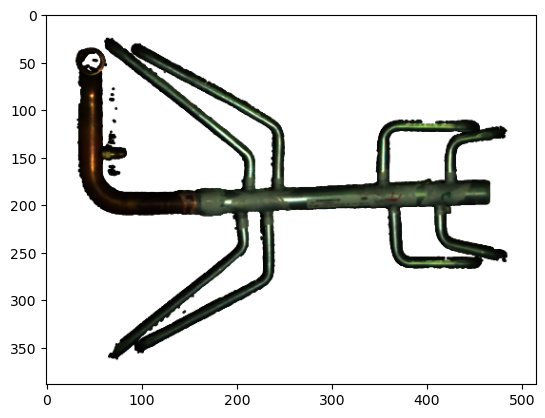

In [3]:
manifold_orig = cv.imread(MANIFOLD_IMG_PATH)
manifold_orig = cv.cvtColor(manifold_orig, cv.COLOR_BGR2RGB)
plt.imshow(manifold_orig)

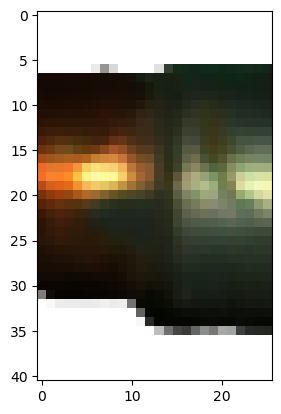

In [4]:
feature_orig = cv.imread(FEATURE_IMG_PATH)
feature_orig = cv.cvtColor(feature_orig, cv.COLOR_BGR2RGB)
plt.imshow(feature_orig)

In [5]:
# Convert manifold and reference feature images to grayscale for (simpler) subsequent processing.
manifold_gray = cv.cvtColor(manifold_orig, cv.COLOR_RGB2GRAY)
feature_gray = cv.cvtColor(feature_orig, cv.COLOR_RGB2GRAY)

## Color Recognition

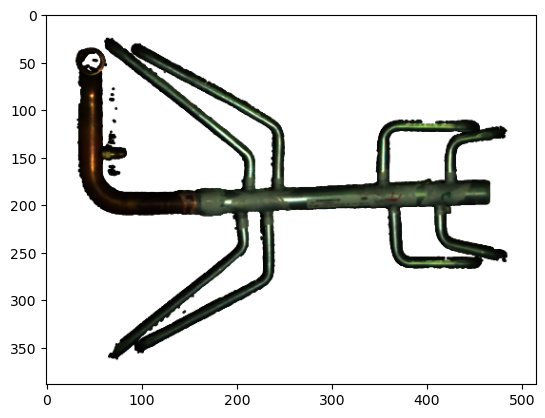

In [6]:
# # Get average colors.
# manifold_color = manifold_orig.copy()
# for x in range(len(manifold_color[0])):
#     for y in range(len(manifold_color)):
#         rgb = list(manifold_color[y, x])
#         if rgb != [255, 255, 255]:
#             if rgb[0] < 25 and rgb[1] < 25 and rgb[2] < 25:
#                 manifold_color[y, x] = [255, 255, 255]
#             else:
#                 print(manifold_color[y, x])
# plt.imshow(manifold_color)


# manifold_color = manifold_orig.copy()
# blur = cv.blur(manifold_color,(5,5))
# blur0=cv.medianBlur(blur,5)
# blur1= cv.GaussianBlur(blur0,(5,5),0)
# blur2= cv.bilateralFilter(blur1,9,75,75)
# hsv = cv.cvtColor(manifold_color, cv.COLOR_RGB2HSV)
# low_blue = np.array([100, 100, 100]) # 100, 85, 35
# high_blue = np.array([255, 255, 255]) # 125, 100, 95
# mask = cv.inRange(hsv, low_blue, high_blue)


manifold_color = manifold_orig.copy()

plt.imshow(manifold_color)

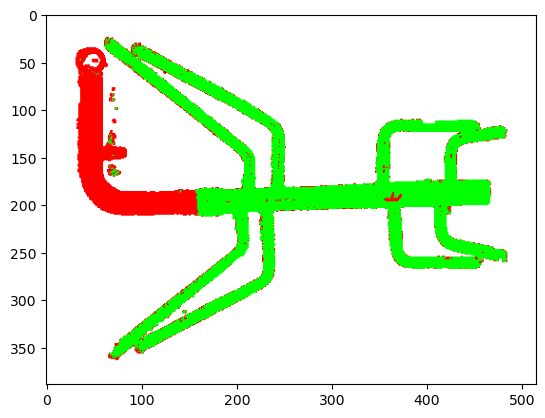

In [7]:
#Stored all RGB values of main colors in a array
# *********Possibly determine these colors by making the user mainly select different colors in the image when
#   creating feature image.********
main_colors = [(255,0,0), (0, 255, 0)] 

image = manifold_orig.copy()
#convert BGR to RGB image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h,w,bpp = np.shape(image)

#Change colors of each pixel
#reference :https://stackoverflow.com/a/48884514/9799700
for py in range(0,h):
    for px in range(0,w):
        color = tuple(list(image[py][px]))
        if color == (255, 255, 255):
            continue
        
        ########################
        #Used this part to find nearest color 
        #reference : https://stackoverflow.com/a/22478139/9799700
        input_color = (image[py][px][0],image[py][px][1],image[py][px][2])
        tree = sp.KDTree(main_colors) 
        ditsance, result = tree.query(input_color) 
        nearest_color = main_colors[result]
        ###################

        image[py][px][0]=nearest_color[0]
        image[py][px][1]=nearest_color[1]
        image[py][px][2]=nearest_color[2]

# show image
plt.figure()
plt.imshow(image)

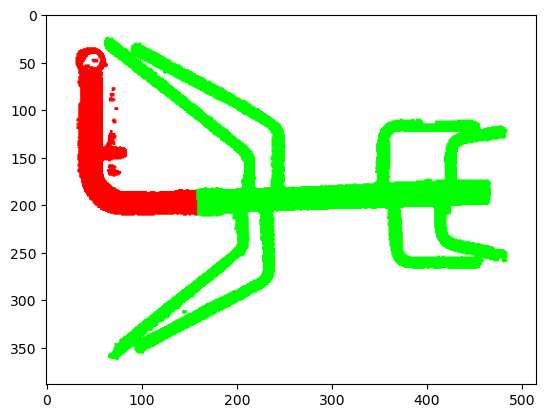

In [8]:
N_SIZE = 10

output = image.copy()

for x in range(len(image[0])):
    for y in range(len(image)):
        colorx = tuple(list(image[y][x]))
        if colorx == (255, 255, 255):
            continue
        
        # Record colors around current x, y pixel.
        colors = {}
        
        min_x = max(0, x-N_SIZE)
        max_x = min(len(image[0])-1, x+N_SIZE)
        min_y = max(0, y-N_SIZE)
        max_y = min(len(image)-1, y+N_SIZE)
        
        for x2 in range(min_x, max_x+1):
            for y2 in range(min_y, max_y+1):
                colory = tuple(list(image[y2][x2]))
                if colory == (255, 255, 255):
                    continue
                
                color = str(image[y2, x2])
                if colors.get(color) == None:
                    colors[color] = 1
                else:
                    colors[color] += 1
                
        # Get most dominant color around this pixel.
        colors_sorted = sorted(colors.items(), key=lambda item: item[1], reverse=True)
        color = colors_sorted[0][0]
        color = color[1:len(color)-1]
        color = " ".join(color.split())
        color = color.split(' ')
        color = [int(x) for x in color]
        
#         if tuple(color) != tuple(list(output[y, x])):
#             print('Changing from {} to {}                    {}'.format(list(output[y, x]), color, colors_sorted))
        
        output[y, x] = color
        
manifold_seg = output.copy()
plt.imshow(manifold_seg)

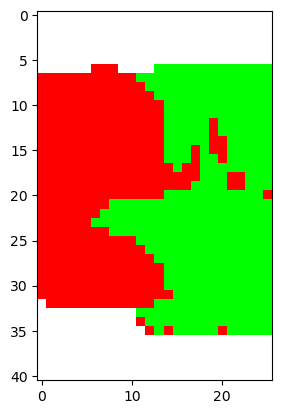

In [9]:
# Convert feature image.
#Stored all RGB values of main colors in a array
# *********Possibly determine these colors by making the user mainly select different colors in the image when
#   creating feature image.********
main_colors = [(255,0,0), (0, 255, 0)] 

image = feature_orig.copy()
#convert BGR to RGB image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h,w,bpp = np.shape(image)

#Change colors of each pixel
#reference :https://stackoverflow.com/a/48884514/9799700
for py in range(0,h):
    for px in range(0,w):
        color = tuple(list(image[py][px]))
        if color == (255, 255, 255):
            continue
        
        ########################
        #Used this part to find nearest color 
        #reference : https://stackoverflow.com/a/22478139/9799700
        input_color = (image[py][px][0],image[py][px][1],image[py][px][2])
        tree = sp.KDTree(main_colors) 
        ditsance, result = tree.query(input_color) 
        nearest_color = main_colors[result]
        ###################

        image[py][px][0]=nearest_color[0]
        image[py][px][1]=nearest_color[1]
        image[py][px][2]=nearest_color[2]

# show image
plt.figure()
plt.imshow(image)

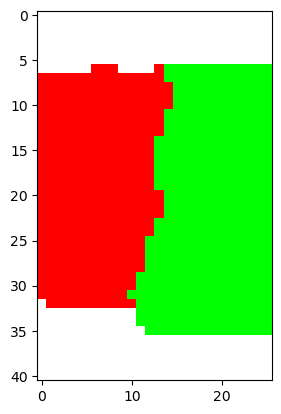

In [10]:
N_SIZE = 10

output = image.copy()

for x in range(len(image[0])):
    for y in range(len(image)):
        colorx = tuple(list(image[y][x]))
        if colorx == (255, 255, 255):
            continue
        
        # Record colors around current x, y pixel.
        colors = {}
        
        min_x = max(0, x-N_SIZE)
        max_x = min(len(image[0])-1, x+N_SIZE)
        min_y = max(0, y-N_SIZE)
        max_y = min(len(image)-1, y+N_SIZE)
        
        for x2 in range(min_x, max_x+1):
            for y2 in range(min_y, max_y+1):
                colory = tuple(list(image[y2][x2]))
                if colory == (255, 255, 255):
                    continue
                
                color = str(image[y2, x2])
                if colors.get(color) == None:
                    colors[color] = 1
                else:
                    colors[color] += 1
                
        # Get most dominant color around this pixel.
        colors_sorted = sorted(colors.items(), key=lambda item: item[1], reverse=True)
        color = colors_sorted[0][0]
        color = color[1:len(color)-1]
        color = " ".join(color.split())
        color = color.split(' ')
        color = [int(x) for x in color]
        
        output[y, x] = color
        
feature_seg = output.copy()
plt.imshow(feature_seg)

(255, 0, 0) 6 18
(0, 255, 0) 18 21


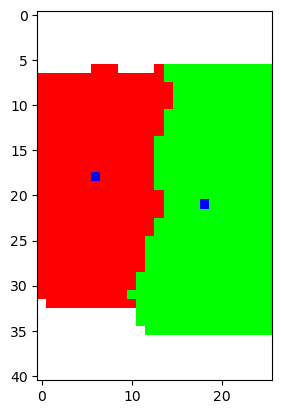

In [11]:
# Find centroids of colors by taking average of the color coordinates, then find average between the centroids to get
#   cross point, then use go a little towards each respective centroid and use this as coordinates that you look for
#   colors in manifold image (to reduce duplicate detections).
# Note: Finding centroids through averages helps against noise.
#   One idea was just to use numpy arrays and see when the value changes from red to green; however, if there is noise, it
#   might unintentionally pick that noise up as the change -- average is more resilient.
# TODO: The above, for simplicity's sake, just using the centroids for now, not the average of the centroids.

# Compute centroids for each color by taking average of pixels' values for each color.
centroids_data = {}
for color in main_colors:
    centroids_data[str(color)] = [0, 0, 0] # x, y, # of points
    
for x in range(len(feature_seg[0])):
    for y in range(len(feature_seg)):
        color = tuple(list(feature_seg[y, x]))
        if color == (255, 255, 255):
            continue
            
        centroids_data[str(color)][0] += x
        centroids_data[str(color)][1] += y
        centroids_data[str(color)][2] += 1
    
feature_seg_output = feature_seg.copy()
    
# Output centroids of each color.
centroids = []
for color, centroid in centroids_data.items():
    x_centroid = int(centroid[0] / centroid[2])
    y_centroid = int(centroid[1] / centroid[2])
    centroids.append([color, x_centroid, y_centroid])
    feature_seg_output[y_centroid, x_centroid] = [0, 0, 255]
    print(color, x_centroid, y_centroid)
    
# # Compute location where colors change by taking average of color centroids.
# x_centroid = 0
# y_centroid = 0
# for centroid in centroids:
#     x_centroid += centroid[0]
#     y_centroid += centroid[1]
# x_centroid = int(x_centroid / len(centroid))
# y_centroid = int(y_centroid / len(centroid))

# feature_seg_output[y_centroid, x_centroid] = [0, 0, 255]
    
plt.imshow(feature_seg_output)

In [12]:
# Slide window, find average midpoints.
# Go pixel-by-pixel through the manifold image, then determine if colors in correct places.
points_of_interest = []
points_of_interest_data = []
for x in range(len(manifold_seg[0])):
    for y in range(len(manifold_seg)):
        # Skip if comparison will be out of bounds in manifold image.
        if ((y + len(feature_seg)) > len(manifold_seg)-1) or ((x + len(feature_seg[0])) > len(manifold_seg[0])-1):
            continue
        
        # Extract "window" of manifold image to compare with reference feature.
        extraction = manifold_seg[y:len(feature_seg)+y, x:len(feature_seg[0])+x]
        
        # Determine if the current extraction window matches the colors of the centroids found above from feature image.
        matched = True
        for centroid in centroids:
            color, x_centroid, y_centroid = centroid
            color = color[1:len(color)-1].split(", ")
            for i in range(len(color)):
                color[i] = int(color[i])
            if tuple(extraction[y_centroid, x_centroid]) != tuple(color):
                matched = False
                
        if matched == True:
            points_of_interest.append('({}, {})'.format(x, y))
            points_of_interest_data.append([x, y])
    print('\r', 'Progress: {}%'.format(str(int(x / int(len(manifold_seg[0])-1) * 100))), end='')
print(points_of_interest)

 Progress: 100%['(46, 17)', '(47, 18)', '(48, 18)', '(49, 19)', '(49, 20)', '(50, 19)', '(50, 20)', '(51, 20)', '(51, 21)', '(52, 21)', '(53, 22)', '(53, 23)', '(54, 23)', '(140, 167)', '(140, 168)', '(140, 169)', '(140, 170)', '(140, 171)', '(140, 172)', '(140, 173)', '(140, 174)', '(141, 166)', '(141, 167)', '(141, 168)', '(141, 169)', '(141, 170)', '(141, 171)', '(141, 172)', '(141, 173)', '(141, 174)', '(141, 175)', '(141, 176)', '(141, 177)', '(141, 178)', '(141, 179)', '(141, 180)', '(141, 181)', '(141, 182)', '(141, 183)', '(141, 184)', '(141, 185)', '(141, 186)', '(141, 187)', '(141, 188)', '(141, 189)', '(141, 190)', '(142, 166)', '(142, 167)', '(142, 168)', '(142, 169)', '(142, 170)', '(142, 171)', '(142, 172)', '(142, 173)', '(142, 174)', '(142, 175)', '(142, 176)', '(142, 177)', '(142, 178)', '(142, 179)', '(142, 180)', '(142, 181)', '(142, 182)', '(142, 183)', '(142, 184)', '(142, 185)', '(142, 186)', '(142, 187)', '(142, 188)', '(142, 189)', '(142, 190)', '(143, 166)', '(

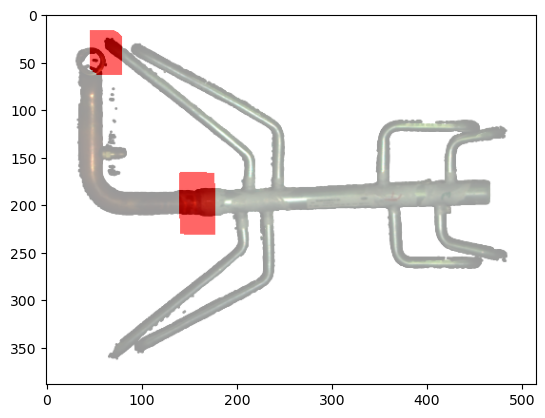

In [13]:
# This is just a naive way to get a blank version of the manifold figure for overlaying detections.
manifold_overlay = manifold_orig.copy()
for x in range(len(manifold_overlay[0])):
    for y in range(len(manifold_overlay)):
        manifold_overlay[y, x] = (255, 255, 255)

# Draw detection locations on blank overlay figure.
for pt in points_of_interest_data:
    for x in range(pt[0], len(feature_seg[0])+pt[0]):
        for y in range(pt[1], len(feature_seg)+pt[1]):
            manifold_overlay[y, x] = (255, 0, 0)
            
# Overlay detections onto the manifold image.
plt.imshow(manifold_orig)
plt.imshow(manifold_overlay, alpha=0.6)
plt.show()

In [14]:
# To speed up computation, use regular vectorization feature detection to find possible "material change" locations, then
#   only segment those "extractions" and compare with T-joint.
# This is also more modular, in case in the future, want to use color segmentation for another type of feature.
#   Can simply set "segmentColors" or something like that to automatically look for colors as well as shapes in feature
#   detection.

### Step 1: Vectorization

In [15]:
# Colors in a neighborhood centered at the passed (x, y).
# ***For Visualization / Debugging Purposes Only***
def draw_neighborhood(x_centroid, y_centroid, color, img):
    min_x = max(0, x_centroid-NEIGHBORHOOD_SIZE)
    max_x = min(len(img[0])-1, x_centroid+NEIGHBORHOOD_SIZE)
    min_y = max(0, y_centroid-NEIGHBORHOOD_SIZE)
    max_y = min(len(img)-1, y_centroid+NEIGHBORHOOD_SIZE)
    
    for x in range(min_x, max_x+1):
        for y in range(min_y, max_y+1):
            img[y, x] = color
    
    return img

In [16]:
def add_vectors(v1, v2):
    return {'x': v1['x'] + v2['x'], 'y': v1['y'] + v2['y']}


# Determines if point is outside the passed image's boundaries.
#   If so, take the nearest pixel's value.
# Without this, the image edges will have skewed vector directions due to the missing (out of bounds) neighborhood portion.
def get_out_of_bounds_vector_ref(x, y, img):
    if x < 0:
        if y < 0:
            # Out of bounds at... left, top --> take 0,0
            return [0, 0]
        elif y > len(img)-1:
            # Out of bounds at... left, bottom --> take 0,len(img)-1
            return [0, len(img)-1]
        else:
            # Out of bounds at... left --> take 0,y
            return [0, y]
    elif x > len(img[0])-1:
        if y < 0:
            # Out of bounds at... right, top --> take len(img[0])-1,0
            return [len(img[0])-1, 0]
        elif y > len(img)-1:
            # Out of bounds at... right, bottom --> take len(img[0])-1,len(img)-1
            return [len(img[0])-1, len(img)-1]
        else:
            # Out of bounds at... right --> take len(img[0])-1,y
            return [len(img[0])-1, y]
    elif y < 0:
        # Out of bounds at... top --> take x,0
        return [x, 0]
    elif y > len(img)-1:
        # Out of bounds at... bottom --> take x,len(img)-1
        return [x, len(img)-1]
    else:
        # Passed point is within the image's boundaries, so return empty array to signify this.
        return []
    

# Calculates the neighborhood and superposition vector at a given (x, y) point.
def calculate_neighborhood_vector(x_centroid, y_centroid, img):
    # Note: The neighborhood is simply a cube, with centroid (x, y) and width/height of NEIGHBORHOOD_SIZE*2+1.
    x1 = x_centroid - NEIGHBORHOOD_SIZE
    y1 = y_centroid - NEIGHBORHOOD_SIZE
    
    x2 = x_centroid + NEIGHBORHOOD_SIZE
    y2 = y_centroid + NEIGHBORHOOD_SIZE
    
    # At each point in neighborhood, calculate vector from centroid, if not empty, and calculate
    #   superposition vector along the way.
    vector = {'x': 0, 'y': 0}
    vector_init = True
    for x in range(x1, x2+1):
        for y in range(y1, y2+1):
            # Determine if out of bounds; if so, then take the nearest pixel's value.
            ref = get_out_of_bounds_vector_ref(x, y, img)
            if ref != []:
                # Verify that reference pixel is not empty. Move onto next neighbor if so.
                if img[ref[1], ref[0]] > EMPTY_COLOR_THRESH:
                    continue
            else:
                # Verify that neighbor pixel is not empty. Move onto next neighbor if so.
                if img[y, x] > EMPTY_COLOR_THRESH:
                    continue

            # Make points relative to (x_centroid, y_centroid) being the origin (0, 0). This is for vector operations.
            x_relative = x - x_centroid
            y_relative = y - y_centroid

            if vector_init:
                # First neighbor, so need to initialize superposition vector.
                vector_init = False
                vector = {'x': x_relative, 'y': y_relative}
            else:
                # Add "neighbor -> centroid" vector to superposition vector.
                new_vector = {'x': x_relative, 'y': y_relative}
                vector = add_vectors(vector, new_vector)
            
    return vector

In [17]:
# Determines the "sign" of one of a vector's axes.
def get_vector_axis_sign(axis_value, enforce_zero_strictly=False):
    # Note: When enforce_zero_strictly is False, if the vector's direction is "close" to zero (as defined by the
    #   ZERO_DIRECTION_THRESH), then classify its direction as zero. This helps fight against noise / slight
    #   imperfections in the image.
    if (enforce_zero_strictly == True and axis_value == 0) or (enforce_zero_strictly == False and axis_value <= ZERO_DIRECTION_THRESH and axis_value >= -ZERO_DIRECTION_THRESH):
        return '0'
    elif axis_value > 0:
        return '+'
    elif axis_value < 0:
        return '-'
    else:
        return 'E' # Error


# Retrieves the color for a given vector's direction.
def get_color_by_signs(x_sign, y_sign):
    color = (255, 255, 255)
    if x_sign == '+':
        if y_sign == '+':
            color = (0, 255, 0) # Green
        elif y_sign == '-':
            color = (175, 0, 255) # Purple
        elif y_sign == '0':
            color = (0, 255, 255) # Sky Blue
    elif x_sign == '-':
        if y_sign == '+':
            color = (255, 150, 0) # Orange
        elif y_sign == '-':
            color = (140, 100, 75) # Brown
        elif y_sign == '0':
            color = (100, 180, 130) # Teal
    elif x_sign == '0':
        if y_sign == '+':
            color = (0, 0, 255) # Blue
        elif y_sign == '-':
            color = (0, 150, 0) # Dark Green
        elif y_sign == '0':
            color = (255, 255, 0) # Yellow
    
    return color


# Generalizes neighborhood by assigning a color based on the passed superposition vector's direction.
def generalize_neighborhood(vector):
    # Determine "sign" of vector's (x, y) components.
    #   Possible (x, y) "sign" combinations: ++, -+, +-, --, 00, 0+, 0-, +0, -0
    x = get_vector_axis_sign(vector['x'])
    y = get_vector_axis_sign(vector['y'])
    
    # Retrieve the color for the superposition vector's direction.
    color = get_color_by_signs(x, y)
    
    return color

In [20]:
# File Paths
MANIFOLD_IMG_PATH = 'manifold.png'
FEATURE_IMG_PATH = 'feature.png'

# Vectorization Hyperparameters
NEIGHBORHOOD_SIZE = 3
EMPTY_COLOR_THRESH = 254
ZERO_DIRECTION_THRESH = NEIGHBORHOOD_SIZE

# Comparison Hyperparameters
DIFF_THRESH = 25000

In [21]:
# Vectorizes the given image, calculating neighborhood superposition vectors for each pixel, then saving those
#   superposition vectors' directions by visualizing them with different colors.
def vectorize_image(img_gray, img_color):
    # Calculate and visualize superposition vector for each pixel in image.
    for x in range(len(img_gray[0])):
        for y in range(len(img_gray)):
            vector = calculate_neighborhood_vector(x, y, img_gray)
            color = generalize_neighborhood(vector)
            img_color[y, x] = color
    
    return img_color

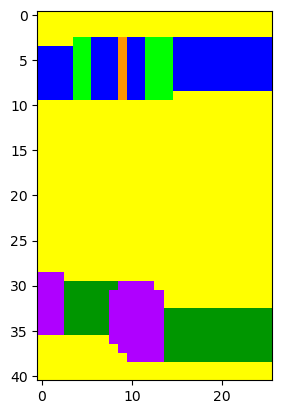

In [22]:
# Vectorize feature.
feature_vectorized = feature_orig.copy()
feature_vectorized = vectorize_image(feature_gray, feature_vectorized)
plt.imshow(feature_vectorized)

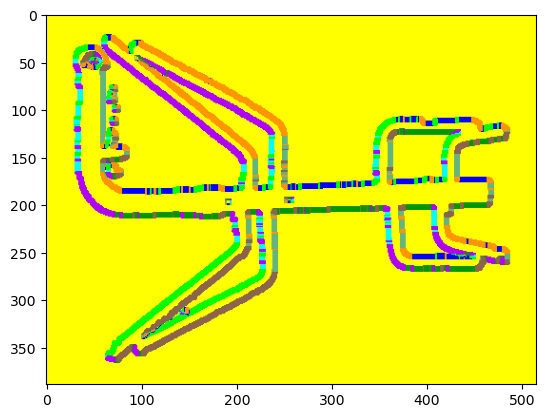

In [23]:
# Vectorize manifold.
manifold_vectorized = manifold_orig.copy()
manifold_vectorized = vectorize_image(manifold_gray, manifold_vectorized)
plt.imshow(manifold_vectorized)

In [28]:
X_DIFF_THRESH = 25000

f_points_of_interest = []
f_points_of_interest_data = []
for pt in points_of_interest_data:
    extraction = manifold_vectorized[pt[1]:len(feature_vectorized)+pt[1], pt[0]:len(feature_vectorized[0])+pt[0]]
    
    # Compare features by subtracting the window by the reference feature then evaluating the sum of the "difference" image.
    diff = cv.subtract(extraction, feature_vectorized)
    diff = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)
    diff_sum = 0
    for i in range(len(diff[0])):
        for j in range(len(diff)):
            diff_sum += diff[j, i]

    # If the difference between the reference feature and manifold window are low enough, count it as a detection.
    if diff_sum < X_DIFF_THRESH:
        f_points_of_interest.append('({}, {}): {}'.format(pt[0], pt[1], diff_sum))
        f_points_of_interest_data.append([pt[0], pt[1]])
    
f_points_of_interest

['(142, 177): 24428',
 '(142, 178): 23634',
 '(143, 177): 22557',
 '(143, 178): 22424',
 '(144, 176): 24668',
 '(144, 177): 21477',
 '(144, 178): 21845',
 '(145, 176): 24476',
 '(145, 177): 21358',
 '(145, 178): 21837',
 '(146, 176): 23071',
 '(146, 177): 19534',
 '(146, 178): 20224',
 '(146, 179): 24324',
 '(147, 176): 24695',
 '(147, 177): 21231',
 '(147, 178): 22225',
 '(148, 177): 21940',
 '(148, 178): 23484',
 '(149, 177): 22170',
 '(149, 178): 23993',
 '(150, 176): 23996',
 '(150, 177): 20885',
 '(150, 178): 22719',
 '(151, 176): 21362',
 '(151, 177): 17881',
 '(151, 178): 19764',
 '(151, 179): 24061',
 '(152, 178): 20643',
 '(152, 179): 24581']

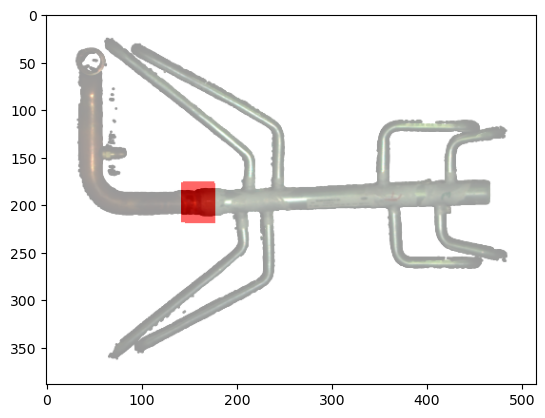

In [30]:
# This is just a naive way to get a blank version of the manifold figure for overlaying detections.
manifold_overlay = manifold_orig.copy()
for x in range(len(manifold_overlay[0])):
    for y in range(len(manifold_overlay)):
        manifold_overlay[y, x] = (255, 255, 255)

# Draw detection locations on blank overlay figure.
for pt in f_points_of_interest_data:
    for x in range(pt[0], len(feature_vectorized[0])+pt[0]):
        for y in range(pt[1], len(feature_vectorized)+pt[1]):
            manifold_overlay[y, x] = (255, 0, 0)
            
# Overlay detections onto the manifold image.
plt.imshow(manifold_orig)
plt.imshow(manifold_overlay, alpha=0.6)
plt.show()

In [31]:
# TODO: To remove the duplicate detections, simply determine a threshold for how close together the detections.
#   If they're practically on top of each other, just combine them into one detection.